# Problem Statement

#Airbnb Hotel Booking Analysis.

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism Leading this revolution is Airbnb, Inc, a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.

#DATA WRANGLING

Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Read the Airbnb data from the Excel file
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

# Display the first few rows of the DataFrame
display(df.head())

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
# Display column names and their data types
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

None

In [6]:
# Check for missing values
display(df.isnull().sum())

,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,408
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [7]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [9]:
df[df['neighbourhood group']=='brookin']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


In [10]:
display(df['neighbourhood group'].unique())

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [12]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

# drop house_rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True)

# remove all dollar signs in the price and service fee columns
df["price"] = df['price'].astype(str).str.replace('$','', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$','', regex=False)

#Remove all commas in the price and service fee columns
df['price'] = df['price'].str.replace(',','', regex=False)
df['service fee'] = df['service fee'].str.replace(',','', regex=False)

# rename the price and service fee columns to include a dollar sign
df.rename(columns={'price': 'price_$', 'service fee': 'service_fee_$'}, inplace=True)

#Drop all records with missing values
df.dropna(inplace=True)

#Change all mismatched data types to the appropriate once.
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

# Task
Analyze the provided Airbnb dataset to understand the distribution of listings across different neighborhood groups and room types, the variation in prices and service fees, and the distribution of other key features like minimum nights, number of reviews, and availability. Additionally, investigate the geographic distribution of listings and identify any outliers in the data. Finally, summarize the key findings from the analysis.

## Explore neighborhood group distribution

### Subtask:
Analyze and visualize the distribution of listings across different neighborhood groups.


**Reasoning**:
Count the occurrences of each unique value in the 'neighbourhood group' column and create a bar plot to visualize the distribution.



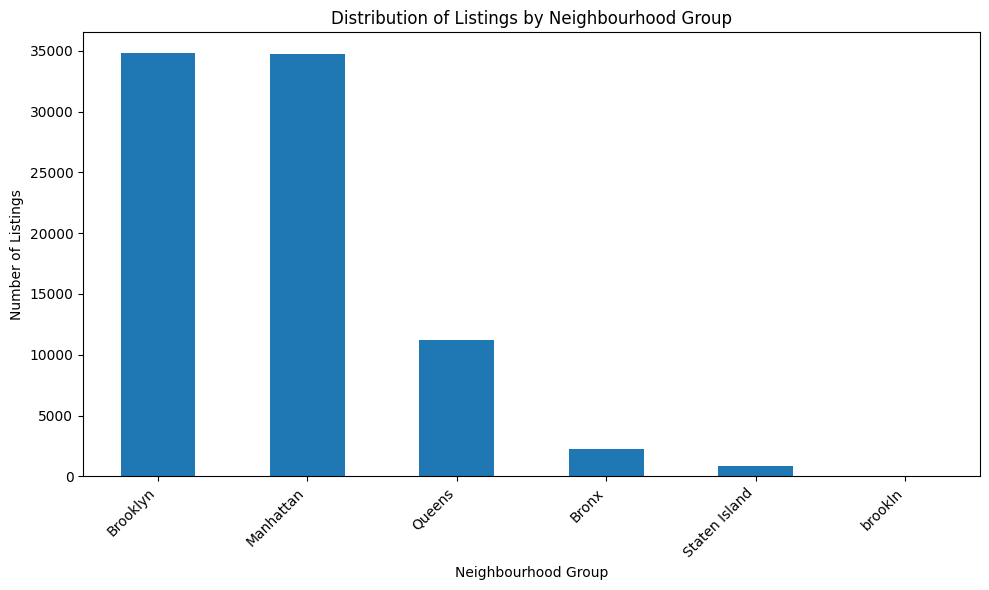

In [13]:
neighbourhood_group_counts = df['neighbourhood group'].value_counts()

plt.figure(figsize=(10, 6))
neighbourhood_group_counts.plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings by Neighbourhood Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze room type distribution

### Subtask:
Examine and visualize the distribution of different room types.


**Reasoning**:
Calculate the value counts for the 'room type' column and create a bar plot to visualize the distribution.



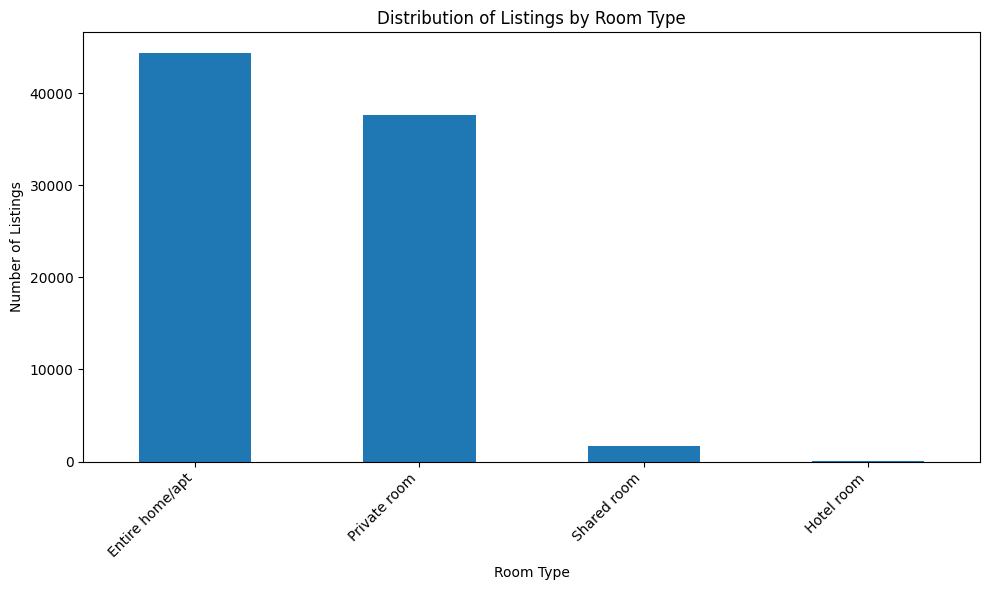

In [14]:
room_type_counts = df['room type'].value_counts()

plt.figure(figsize=(10, 6))
room_type_counts.plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings by Room Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Study price variation by neighborhood group and room type

### Subtask:
Investigate how prices vary across different neighborhood groups and room types using visualizations.


**Reasoning**:
Create two box plots to visualize the distribution of 'price_$' across 'neighbourhood group' and 'room type' as requested.



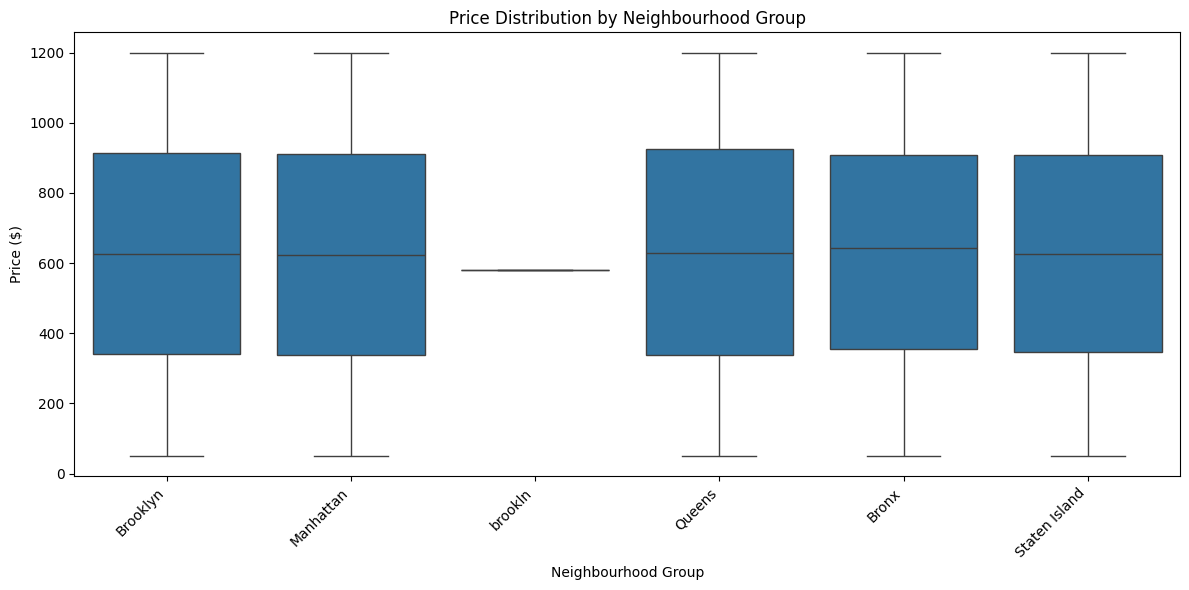

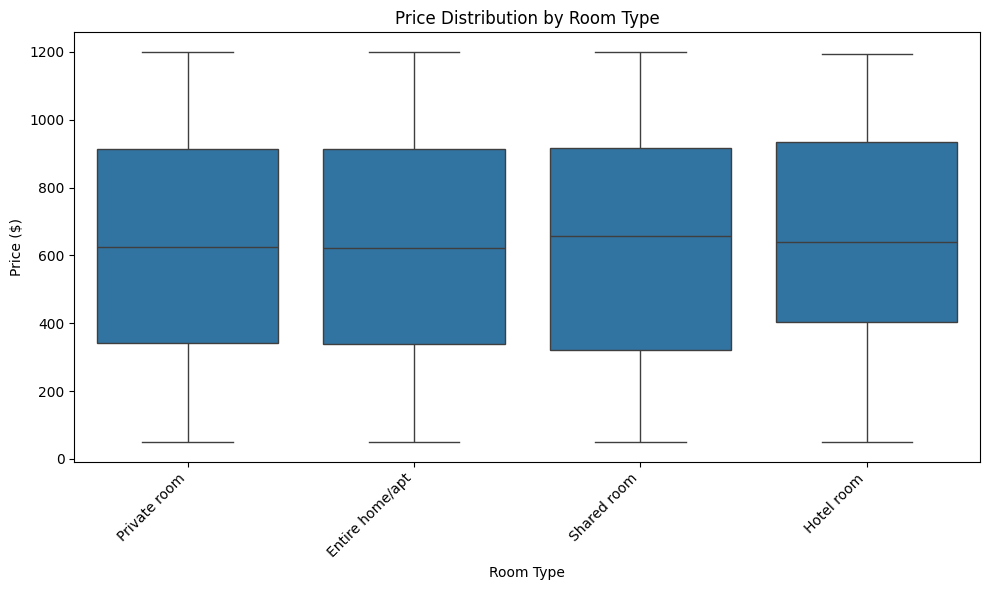

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood group', y='price_$', data=df)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Neighbourhood Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price_$', data=df)
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Room Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze price distribution

### Subtask:
Visualize the distribution of prices to identify any outliers or patterns.


**Reasoning**:
Create a histogram of the 'price_$' column to visualize the distribution of prices.



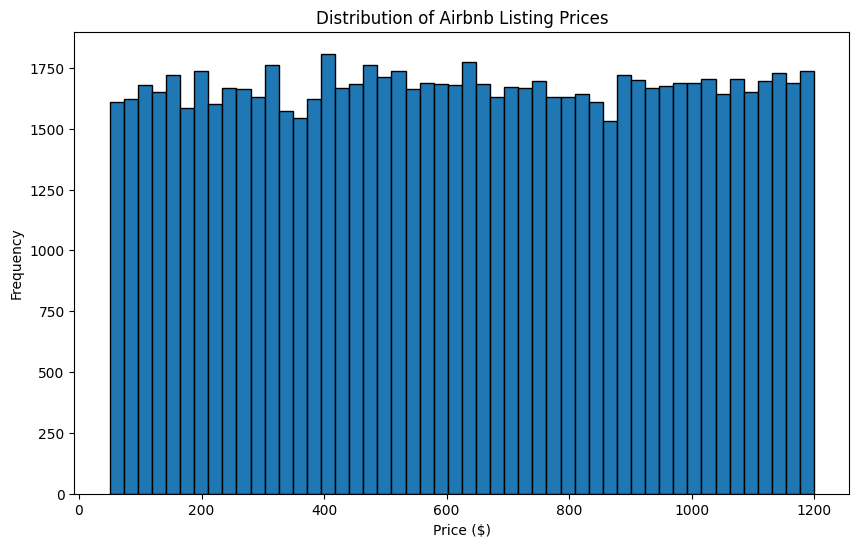

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['price_$'], bins=50, edgecolor='black')
plt.title("Distribution of Airbnb Listing Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

## Examine service fee distribution

### Subtask:
Visualize the distribution of service fees.


**Reasoning**:
Create a histogram to visualize the distribution of service fees with 50 bins, appropriate titles and labels as requested.



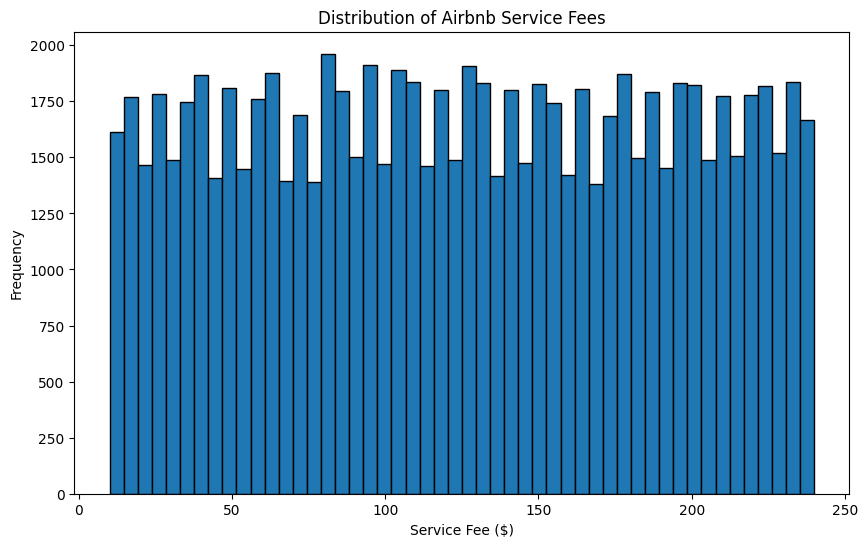

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['service_fee_$'], bins=50, edgecolor='black')
plt.title("Distribution of Airbnb Service Fees")
plt.xlabel("Service Fee ($)")
plt.ylabel("Frequency")
plt.show()

## Investigate minimum nights distribution

### Subtask:
Analyze and visualize the distribution of minimum nights required for bookings.


**Reasoning**:
Generate a histogram to visualize the distribution of minimum nights.



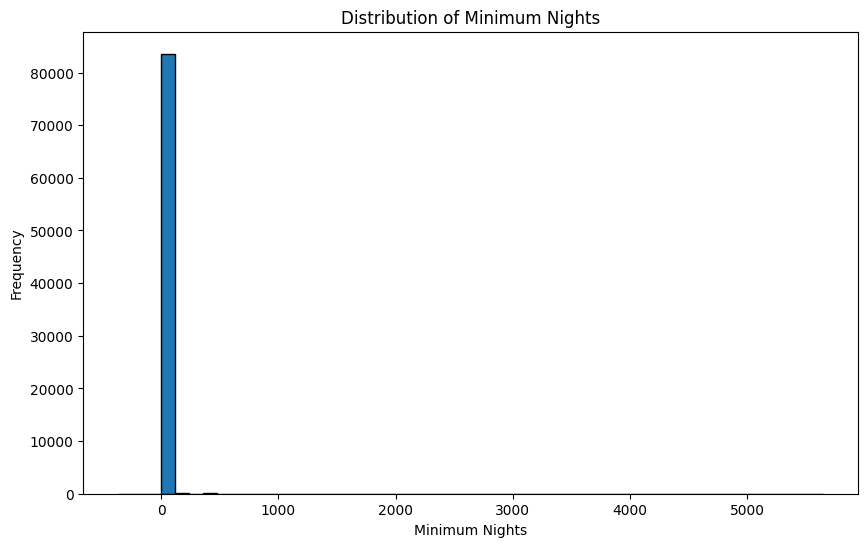

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df['minimum nights'], bins=50, edgecolor='black')
plt.title("Distribution of Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Frequency")
plt.show()

## Analyze number of reviews distribution

### Subtask:
Examine and visualize the distribution of the number of reviews.


**Reasoning**:
Generate a histogram to visualize the distribution of the 'number of reviews' column as requested.



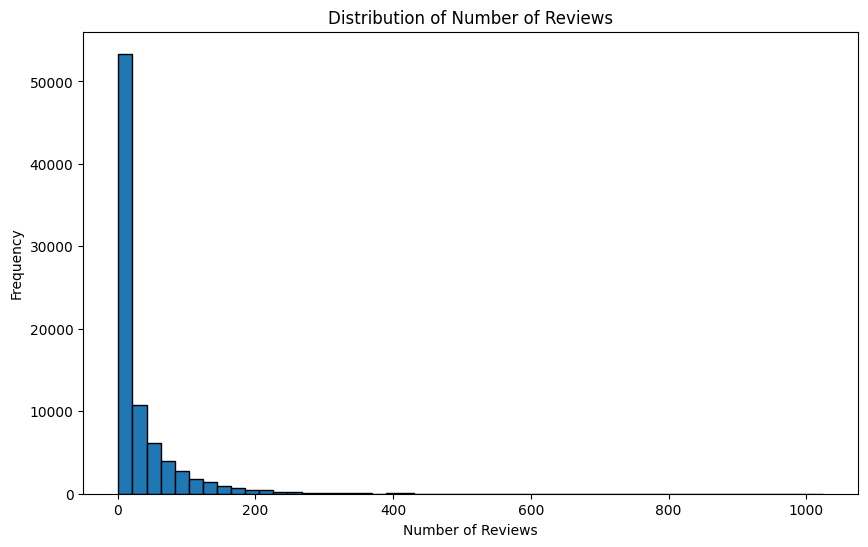

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['number of reviews'], bins=50, edgecolor='black')
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.show()

## Study reviews per month distribution

### Subtask:
Investigate and visualize the distribution of reviews per month.


**Reasoning**:
Create a histogram to visualize the distribution of the 'reviews per month' column with 50 bins and black edges, and add appropriate titles and labels to the plot.



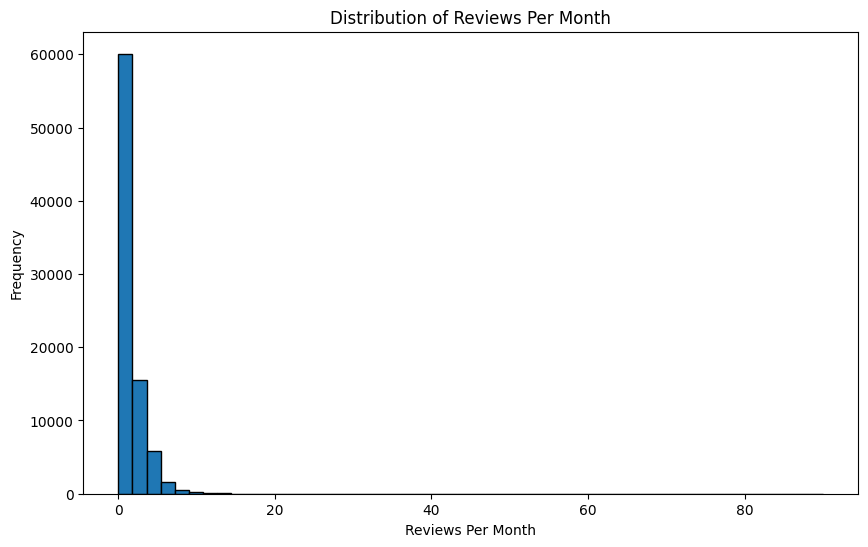

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['reviews per month'], bins=50, edgecolor='black')
plt.title("Distribution of Reviews Per Month")
plt.xlabel("Reviews Per Month")
plt.ylabel("Frequency")
plt.show()

## Analyze review rate number distribution

### Subtask:
Examine and visualize the distribution of the review rate number.


**Reasoning**:
Generate a histogram to visualize the distribution of the 'review rate number' column as requested.



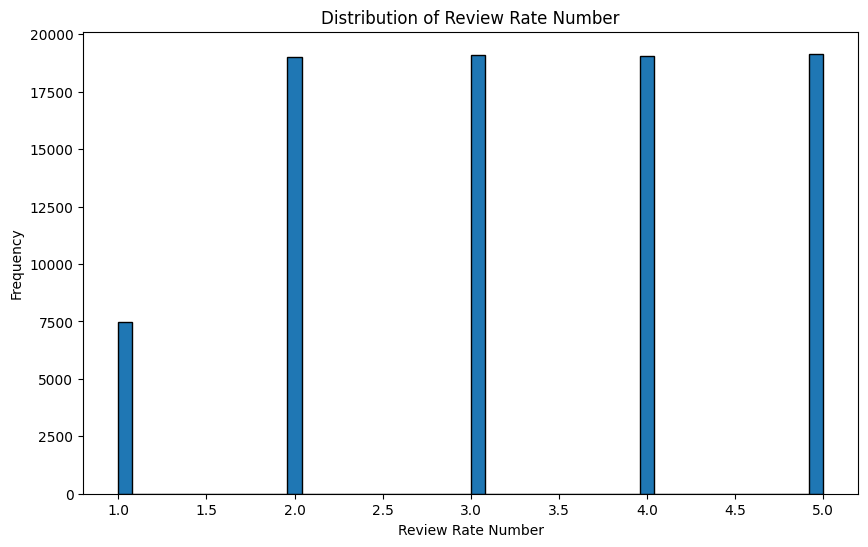

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['review rate number'], bins=50, edgecolor='black')
plt.title("Distribution of Review Rate Number")
plt.xlabel("Review Rate Number")
plt.ylabel("Frequency")
plt.show()

## Explore availability 365 distribution

### Subtask:
Analyze and visualize the distribution of availability over 365 days.


**Reasoning**:
Generate a histogram to visualize the distribution of availability over 365 days.



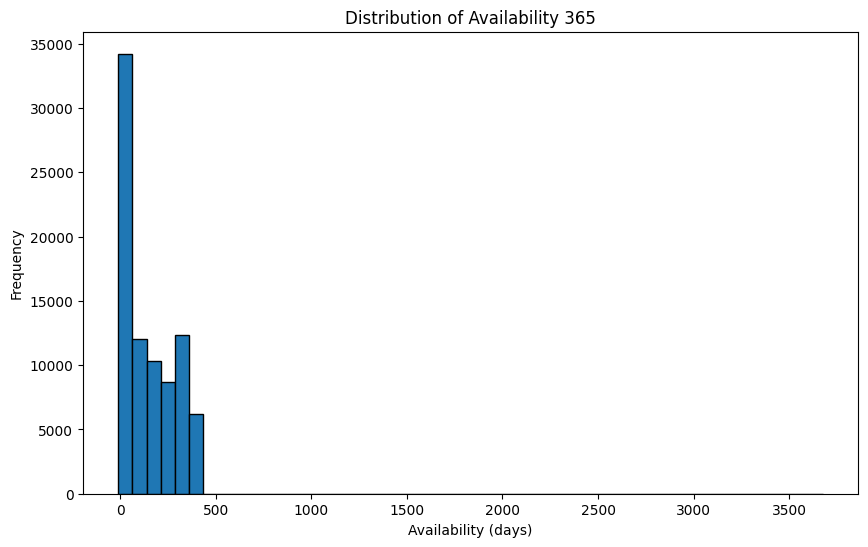

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['availability 365'], bins=50, edgecolor='black')
plt.title("Distribution of Availability 365")
plt.xlabel("Availability (days)")
plt.ylabel("Frequency")
plt.show()

## Investigate construction year distribution

### Subtask:
Study and visualize the distribution of construction years.


**Reasoning**:
Create a histogram of the 'Construction year' column with 50 bins and black edges, set the title and axis labels, and display the plot.



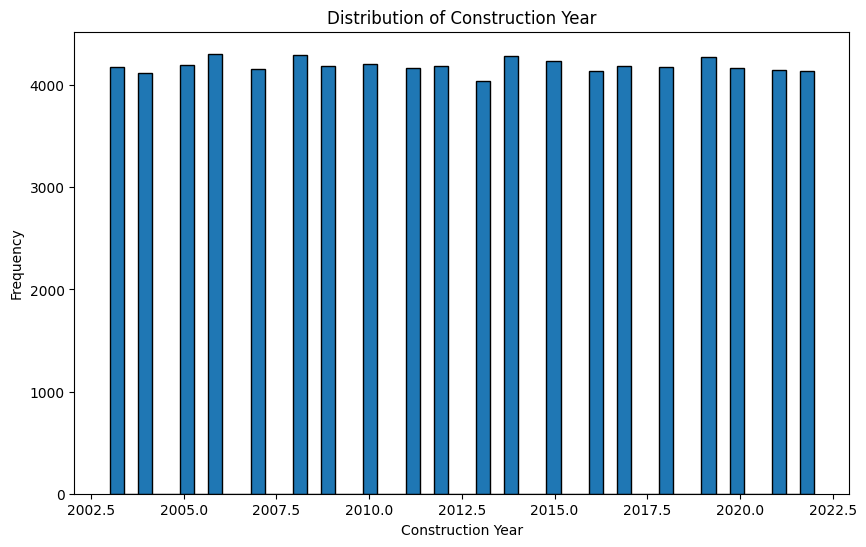

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['Construction year'], bins=50, edgecolor='black')
plt.title("Distribution of Construction Year")
plt.xlabel("Construction Year")
plt.ylabel("Frequency")
plt.show()

## Analyze geographic distribution of listings

### Subtask:
Visualize the geographic distribution of listings using latitude and longitude.


**Reasoning**:
Create a scatter plot to visualize the geographic distribution of listings using latitude and longitude, with point size representing the number of reviews and color indicating the neighbourhood group.



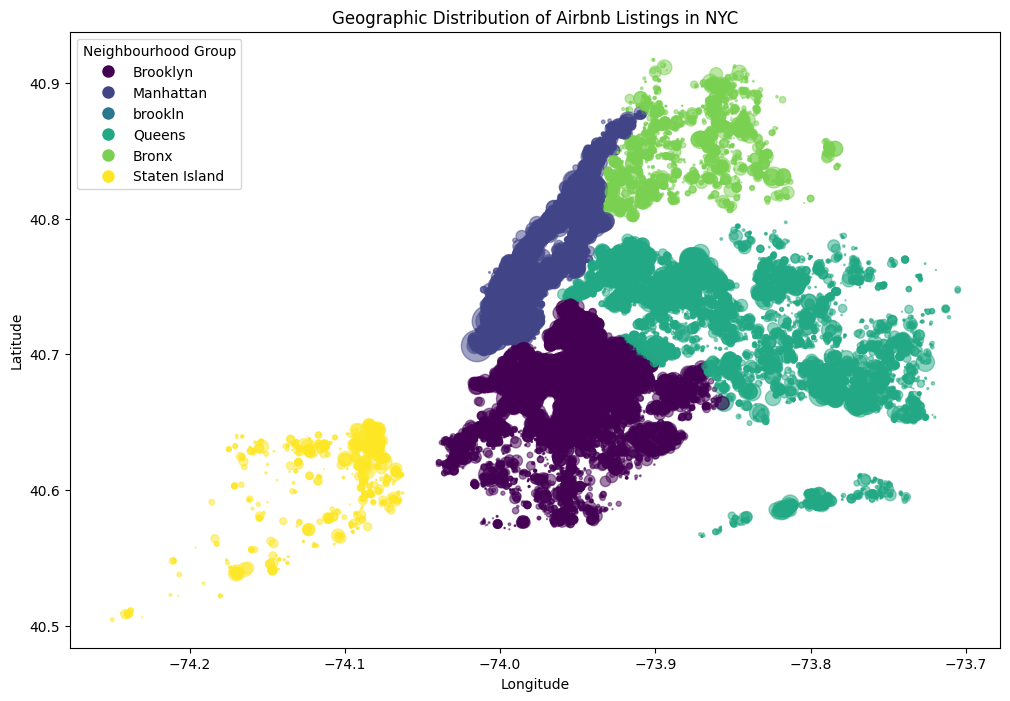

In [24]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['long'], df['lat'], alpha=0.5, s=df['number of reviews']*0.5, c=pd.factorize(df['neighbourhood group'])[0], cmap='viridis')
plt.title("Geographic Distribution of Airbnb Listings in NYC")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
legend_labels = df['neighbourhood group'].unique()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=scatter.cmap(scatter.norm(pd.factorize(legend_labels)[0][i])), markersize=10)
                   for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_elements, title="Neighbourhood Group")
plt.show()

## Identify and handle outliers

### Subtask:
Identify and handle outliers in numerical columns like price, service fee, minimum nights, and number of reviews.


**Reasoning**:
Create box plots for the specified numerical columns to visualize outliers.



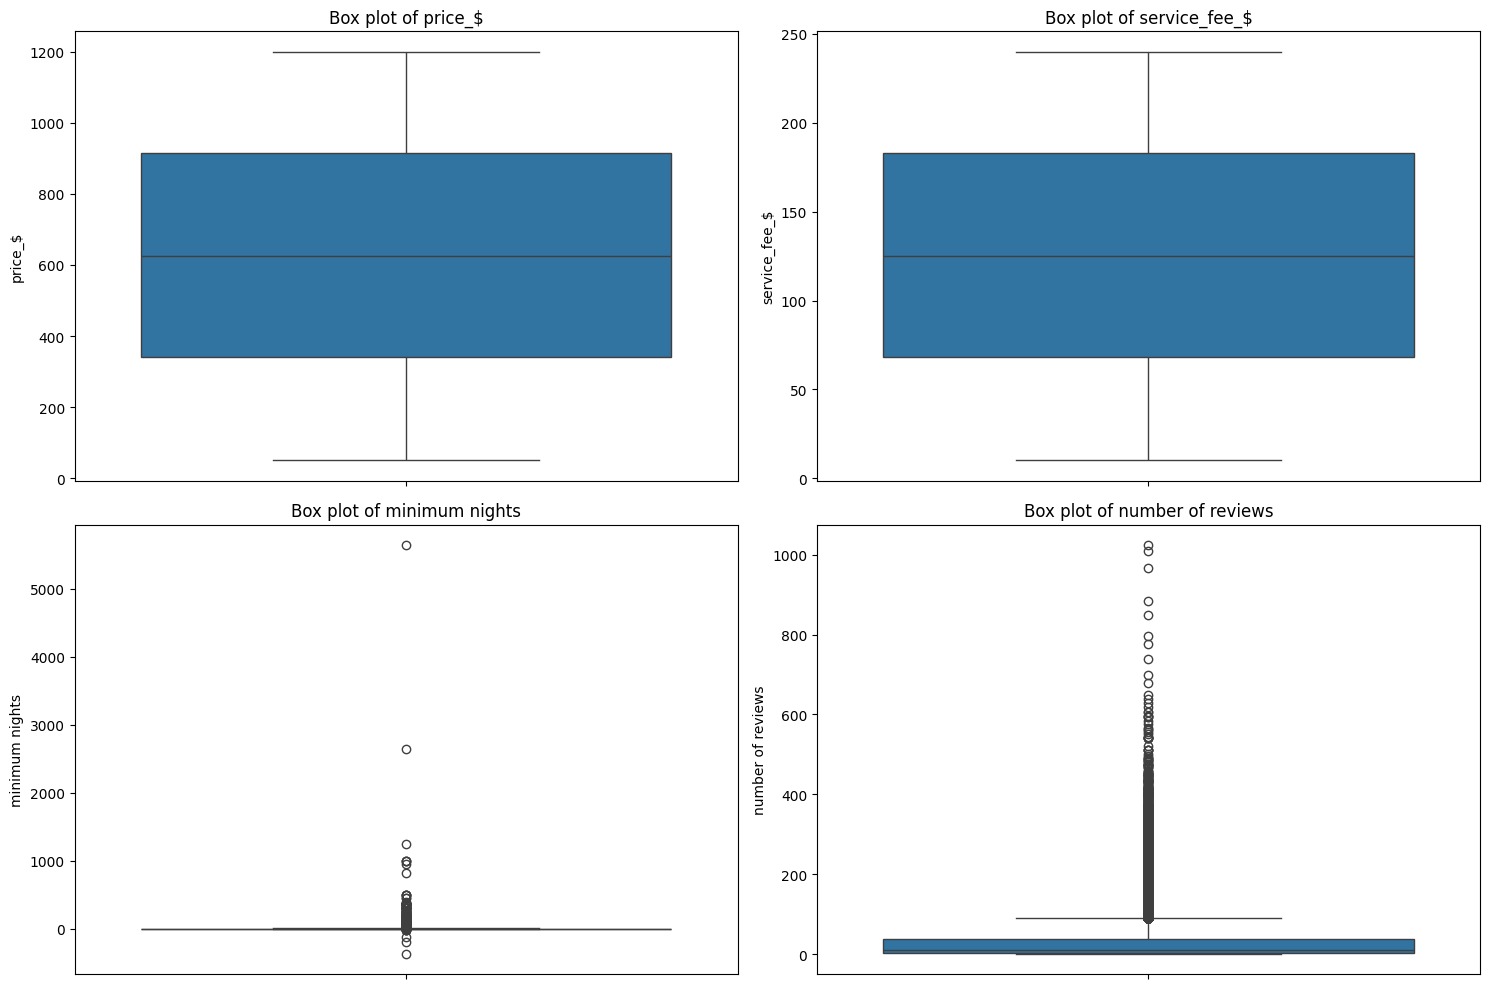

In [25]:
numerical_cols = ['price_$', 'service_fee_$', 'minimum nights', 'number of reviews']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Reasoning**:
Calculate IQR and define outlier bounds for the numerical columns, then identify and remove outlier rows, and display the shape before and after removal.



In [26]:
print("Shape of DataFrame before outlier removal:", df.shape)

numerical_cols = ['price_$', 'service_fee_$', 'minimum nights', 'number of reviews']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in '{col}': {len(outliers)}")

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Shape of DataFrame after outlier removal:", df.shape)

Shape of DataFrame before outlier removal: (83797, 24)
Number of outliers in 'price_$': 0
Number of outliers in 'service_fee_$': 0
Number of outliers in 'minimum nights': 13594
Number of outliers in 'number of reviews': 6473
Shape of DataFrame after outlier removal: (63323, 24)


## Analyze relationships between variables

### Subtask:
Explore relationships between different variables using correlation matrix or scatter plots.


**Reasoning**:
Calculate and visualize the correlation matrix for the numerical columns to explore relationships between variables.



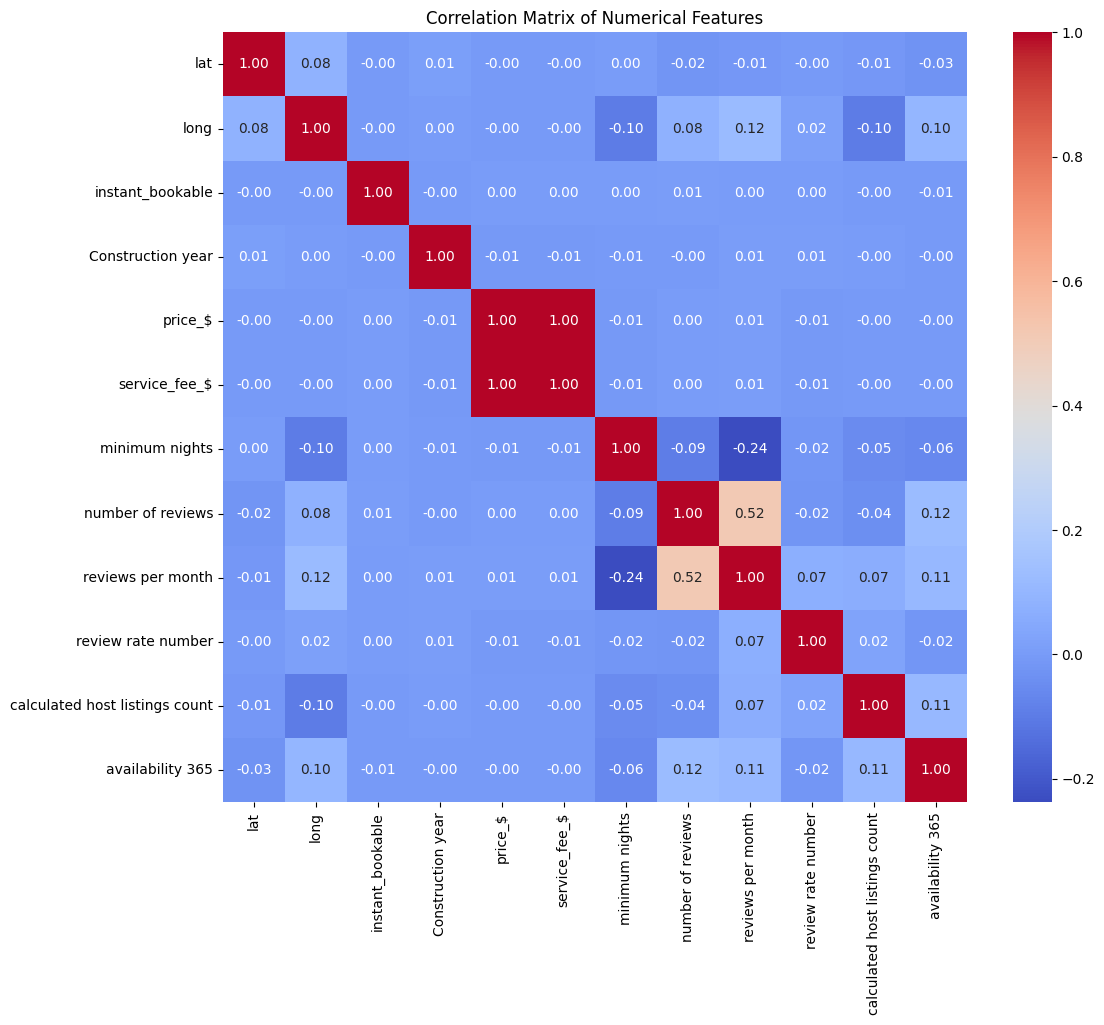

In [27]:
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Summarize findings

### Subtask:
Summarize the key findings from the exploratory data analysis.


## Summary:

### Data Analysis Key Findings

*   **Neighbourhood Group Distribution:** The analysis revealed the distribution of listings across different neighborhood groups, showing the number of listings in each group.
*   **Room Type Distribution:** The distribution of different room types was visualized, indicating the prevalence of 'Entire home/apt', 'Private room', and 'Shared room' listings.
*   **Price Variation:** Box plots showed how prices vary significantly across different neighborhood groups and room types.
*   **Price and Service Fee Distribution:** Histograms visualized the distribution of prices and service fees, highlighting potential outliers and common value ranges.
*   **Minimum Nights Distribution:** The distribution of minimum nights required for bookings was analyzed, revealing the most common minimum stay requirements.
*   **Reviews Distribution:** Histograms showed that the number of reviews and reviews per month distributions are highly skewed, with a large number of listings having few reviews.
*   **Review Rate Number Distribution:** The majority of listings have a review rate number around 10.
*   **Availability Distribution:** The distribution of listing availability over 365 days was visualized.
*   **Construction Year Distribution:** The distribution of construction years was visualized.
*   **Geographic Distribution:** A scatter plot showed the geographic distribution of listings, colored by neighborhood group and sized by the number of reviews, indicating concentrations in certain areas.
*   **Outlier Identification:** Box plots revealed outliers in 'price\_$', 'service\_fee\_$', 'minimum nights', and 'number of reviews'. Using the IQR method, 13,594 outliers were found in 'minimum nights' and 6,473 in 'number of reviews'. No outliers were detected in 'price\_$' and 'service\_fee\_$' using this method.
*   **Impact of Outlier Removal:** Removing outliers using the IQR method reduced the DataFrame size from (83797, 24) to (63323, 24).
*   **Correlation Analysis:** A correlation matrix revealed relationships between numerical variables, such as a positive correlation between the number of reviews and reviews per month.

### Insights or Next Steps

*   Further investigation into the outliers, particularly in 'minimum nights' and 'number of reviews', could involve understanding the reasons behind such extreme values and considering alternative outlier handling methods if necessary.
*   Delve deeper into the relationships identified in the correlation matrix, potentially building models to predict price or other key metrics based on correlated features.


**Reasoning**:
Calculate IQR and define outlier bounds for the numerical columns, then identify and remove outlier rows, and display the shape before and after removal.

In [38]:
print("Shape of DataFrame before outlier removal:", df.shape)

numerical_cols = ['price_$', 'service_fee_$', 'minimum nights', 'number of reviews']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in '{col}': {len(outliers)}")

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Shape of DataFrame after outlier removal:", df.shape)

Shape of DataFrame before outlier removal: (63323, 24)
Number of outliers in 'price_$': 0
Number of outliers in 'service_fee_$': 0
Number of outliers in 'minimum nights': 3167
Number of outliers in 'number of reviews': 3685
Shape of DataFrame after outlier removal: (56471, 24)


## Identify and handle outliers

### Subtask:
Identify and handle outliers in numerical columns like price, service fee, minimum nights, and number of reviews.

**Reasoning**:
Create box plots for the specified numerical columns to visualize outliers.

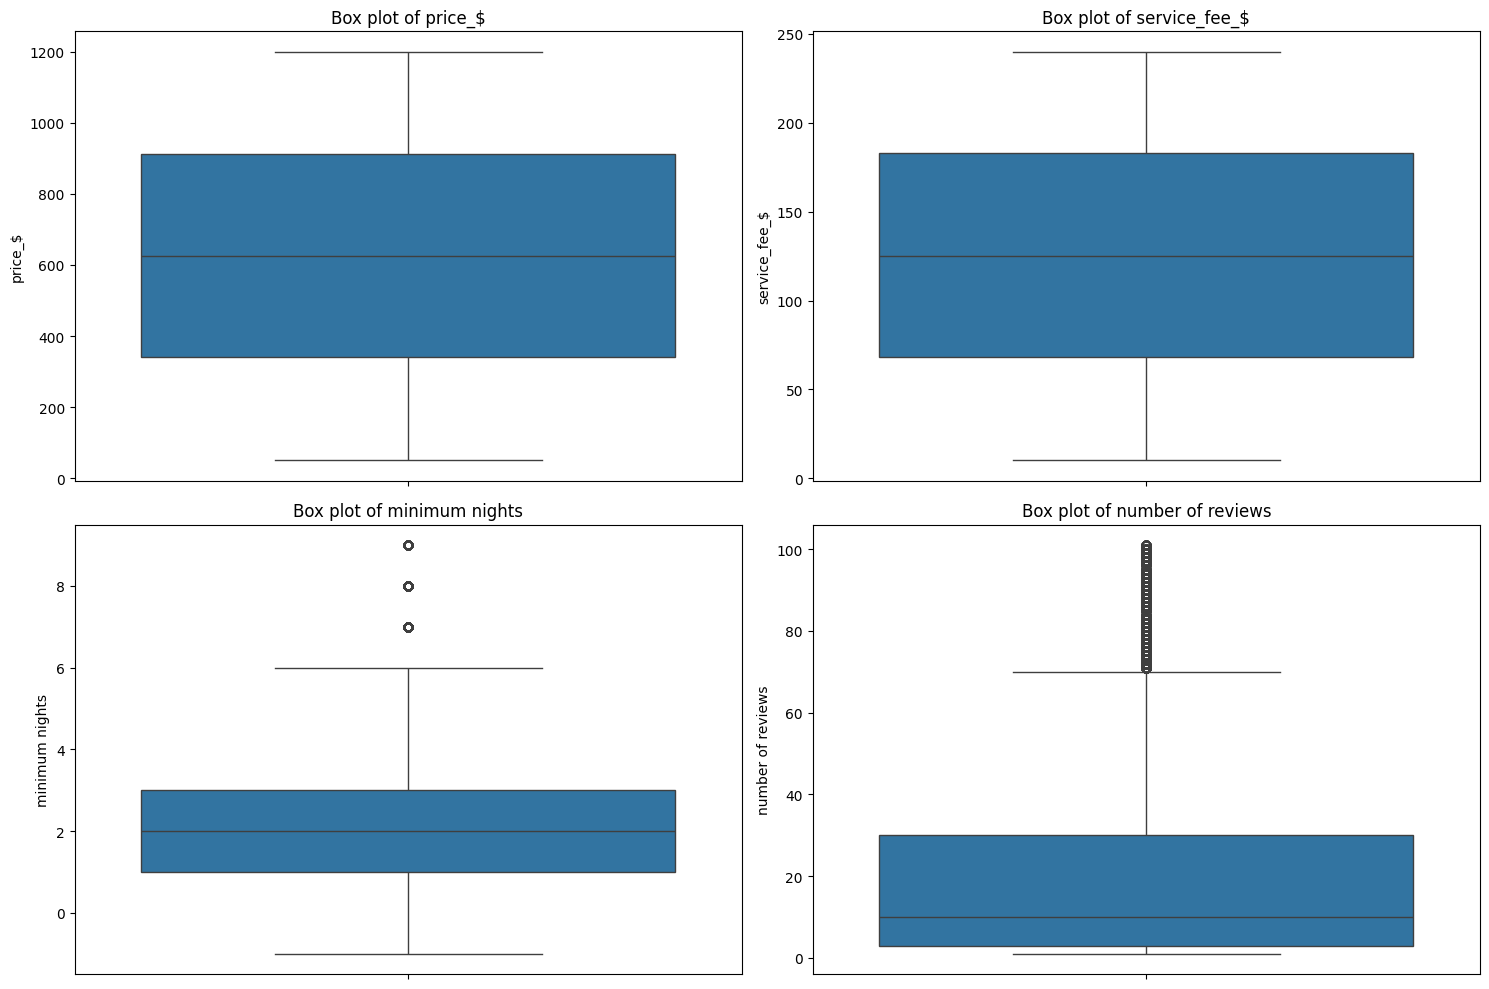

In [37]:
numerical_cols = ['price_$', 'service_fee_$', 'minimum nights', 'number of reviews']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## Analyze geographic distribution of listings

### Subtask:
Visualize the geographic distribution of listings using latitude and longitude.

**Reasoning**:
Create a scatter plot to visualize the geographic distribution of listings using latitude and longitude, with point size representing the number of reviews and color indicating the neighbourhood group.

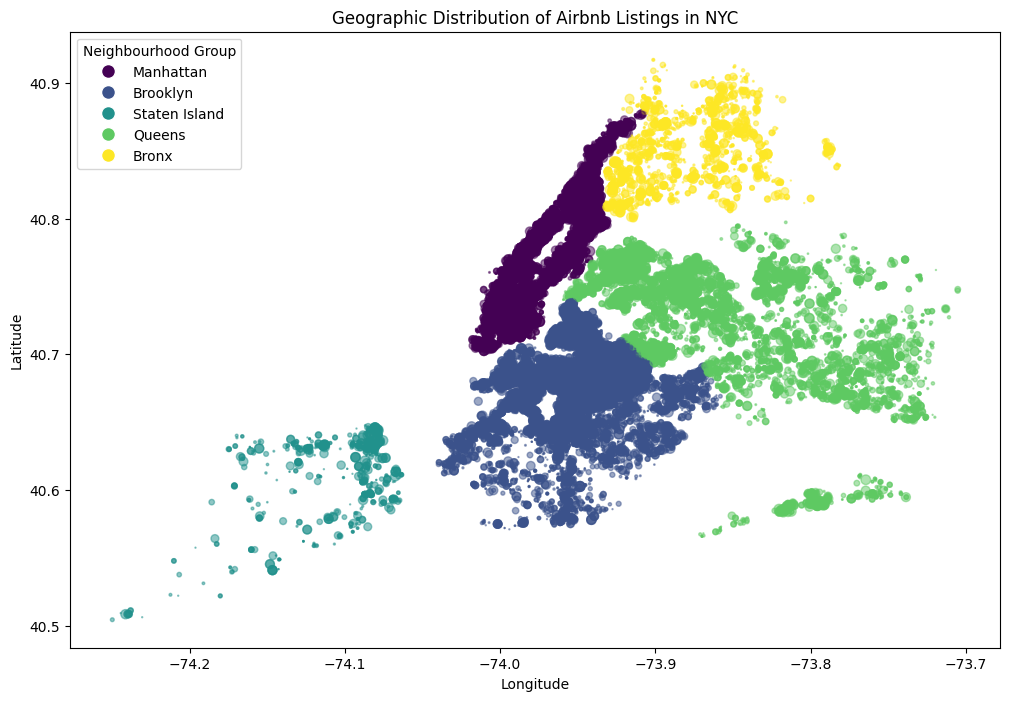

In [36]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['long'], df['lat'], alpha=0.5, s=df['number of reviews']*0.5, c=pd.factorize(df['neighbourhood group'])[0], cmap='viridis')
plt.title("Geographic Distribution of Airbnb Listings in NYC")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
legend_labels = df['neighbourhood group'].unique()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=scatter.cmap(scatter.norm(pd.factorize(legend_labels)[0][i])), markersize=10)
                   for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_elements, title="Neighbourhood Group")
plt.show()

## Investigate construction year distribution

### Subtask:
Study and visualize the distribution of construction years.

**Reasoning**:
Create a histogram of the 'Construction year' column with 50 bins and black edges, set the title and axis labels, and display the plot.

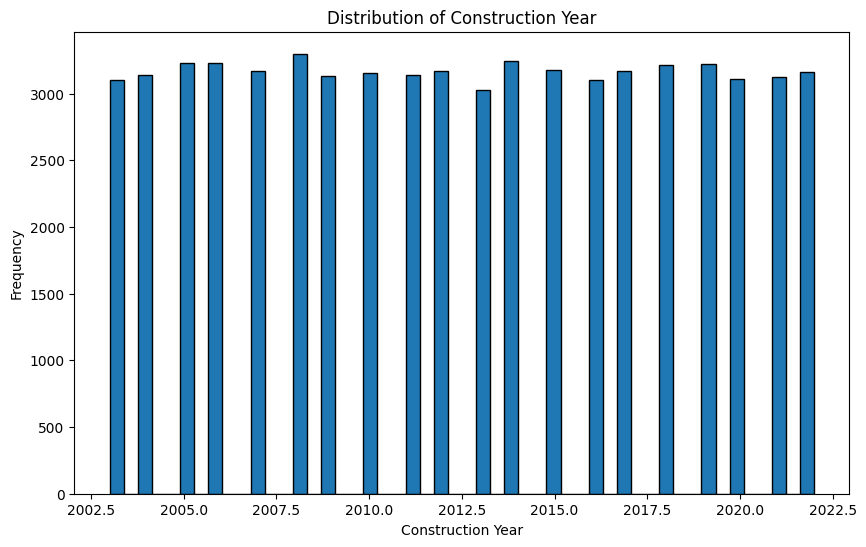

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df['Construction year'], bins=50, edgecolor='black')
plt.title("Distribution of Construction Year")
plt.xlabel("Construction Year")
plt.ylabel("Frequency")
plt.show()

## Explore availability 365 distribution

### Subtask:
Analyze and visualize the distribution of availability over 365 days.

**Reasoning**:
Generate a histogram to visualize the distribution of availability over 365 days.

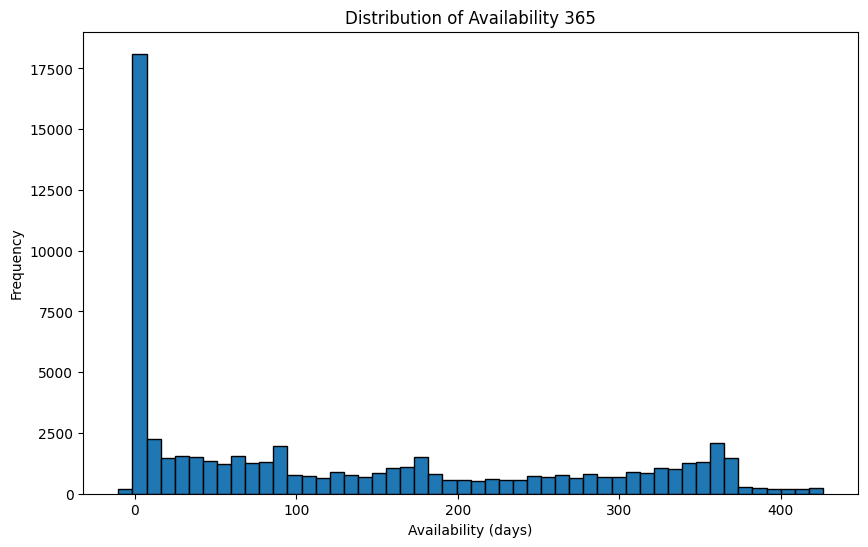

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df['availability 365'], bins=50, edgecolor='black')
plt.title("Distribution of Availability 365")
plt.xlabel("Availability (days)")
plt.ylabel("Frequency")
plt.show()

## Analyze review rate number distribution

### Subtask:
Examine and visualize the distribution of the review rate number.

**Reasoning**:
Generate a histogram to visualize the distribution of the 'review rate number' column as requested.

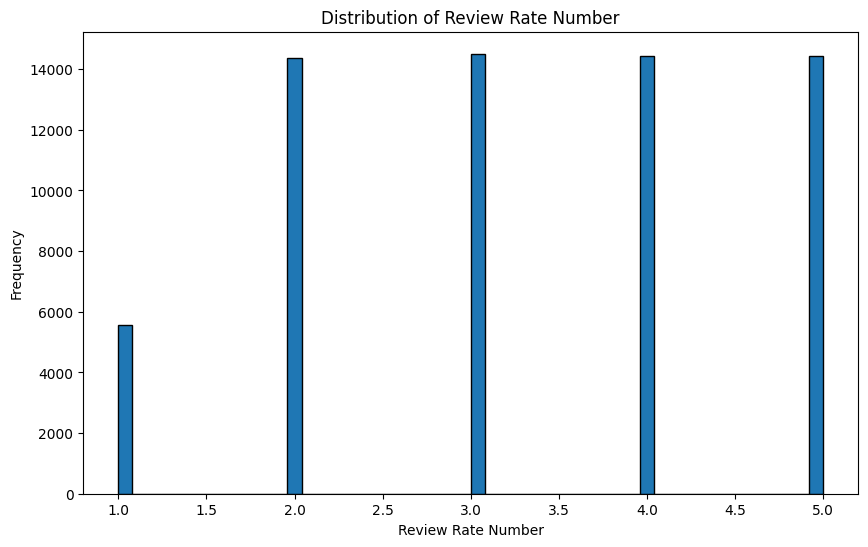

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df['review rate number'], bins=50, edgecolor='black')
plt.title("Distribution of Review Rate Number")
plt.xlabel("Review Rate Number")
plt.ylabel("Frequency")
plt.show()

## Study reviews per month distribution

### Subtask:
Investigate and visualize the distribution of reviews per month.

**Reasoning**:
Create a histogram to visualize the distribution of the 'reviews per month' column with 50 bins and black edges, and add appropriate titles and labels to the plot.

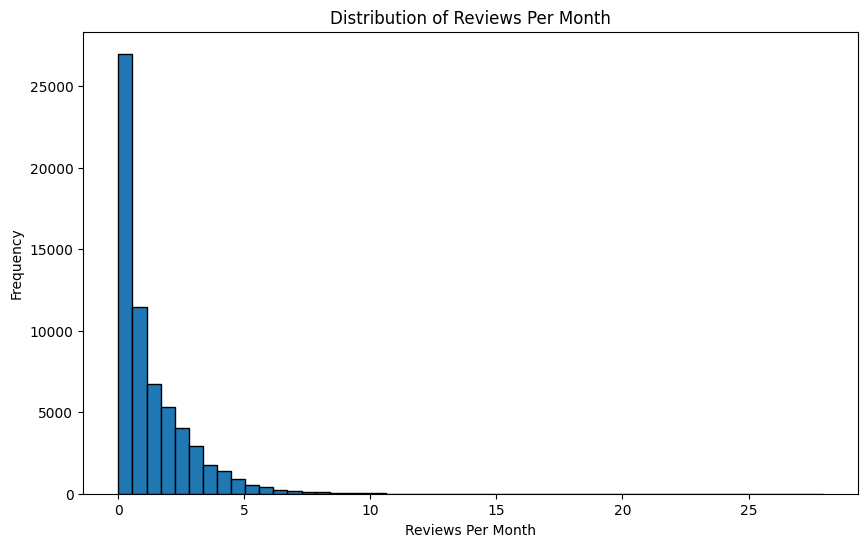

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df['reviews per month'], bins=50, edgecolor='black')
plt.title("Distribution of Reviews Per Month")
plt.xlabel("Reviews Per Month")
plt.ylabel("Frequency")
plt.show()

## Analyze number of reviews distribution

### Subtask:
Examine and visualize the distribution of the number of reviews.

**Reasoning**:
Generate a histogram to visualize the distribution of the 'number of reviews' column as requested.

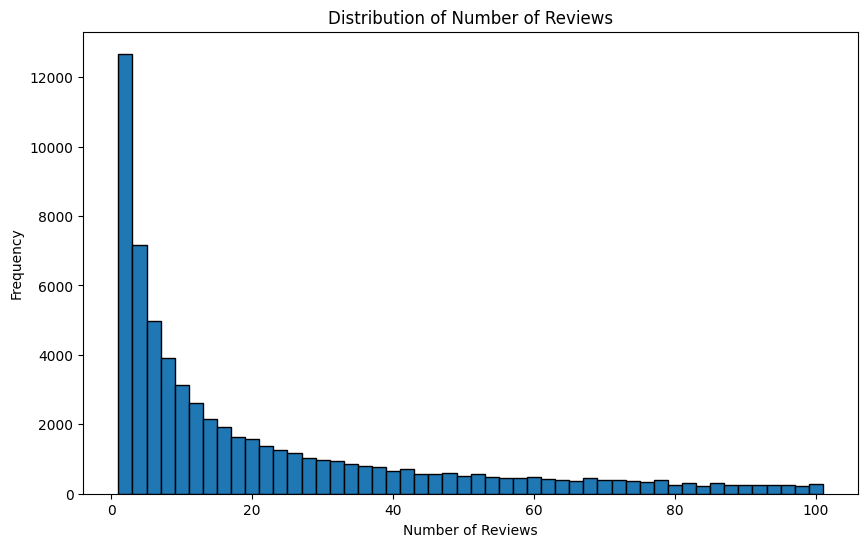

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df['number of reviews'], bins=50, edgecolor='black')
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.show()

## Investigate minimum nights distribution

### Subtask:
Analyze and visualize the distribution of minimum nights required for bookings.

**Reasoning**:
Generate a histogram to visualize the distribution of minimum nights.

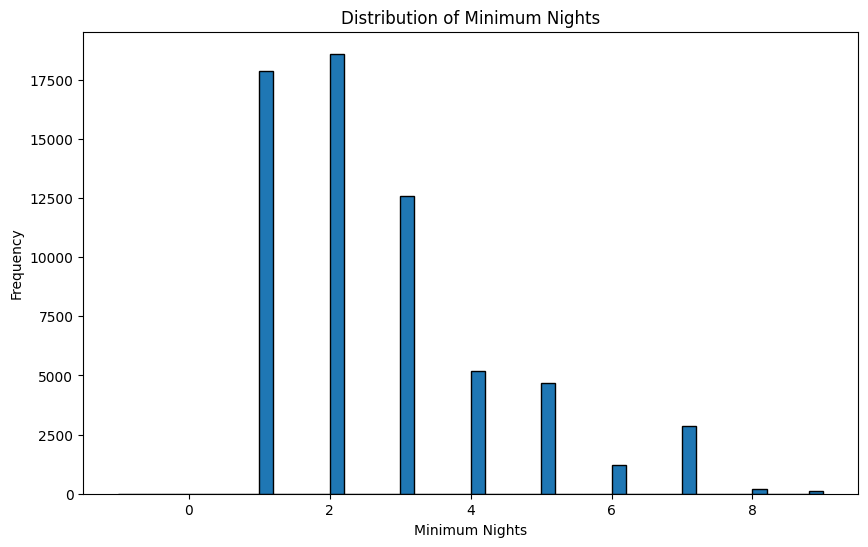

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df['minimum nights'], bins=50, edgecolor='black')
plt.title("Distribution of Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Frequency")
plt.show()

## Examine service fee distribution

### Subtask:
Visualize the distribution of service fees.

**Reasoning**:
Create a histogram to visualize the distribution of service fees with 50 bins, appropriate titles and labels as requested.

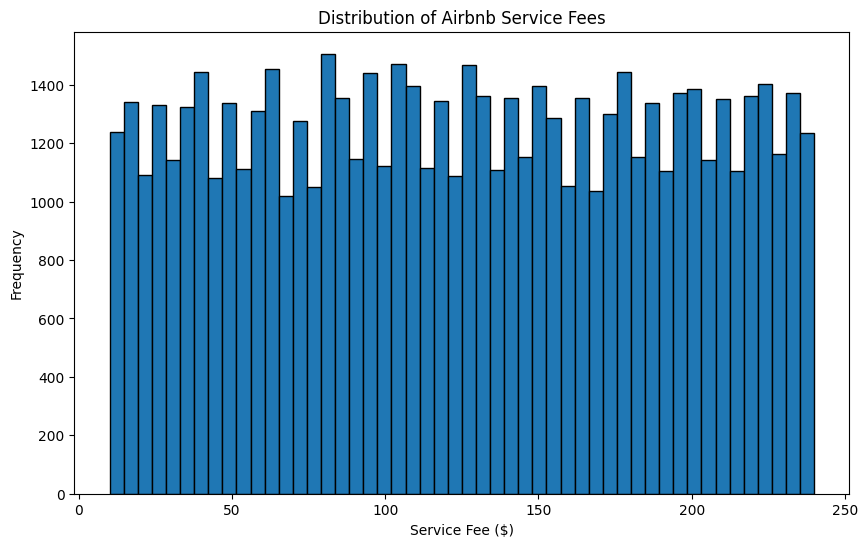

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df['service_fee_$'], bins=50, edgecolor='black')
plt.title("Distribution of Airbnb Service Fees")
plt.xlabel("Service Fee ($)")
plt.ylabel("Frequency")
plt.show()

## Analyze price distribution

### Subtask:
Visualize the distribution of prices to identify any outliers or patterns.

**Reasoning**:
Create a histogram of the 'price_$' column to visualize the distribution of prices.

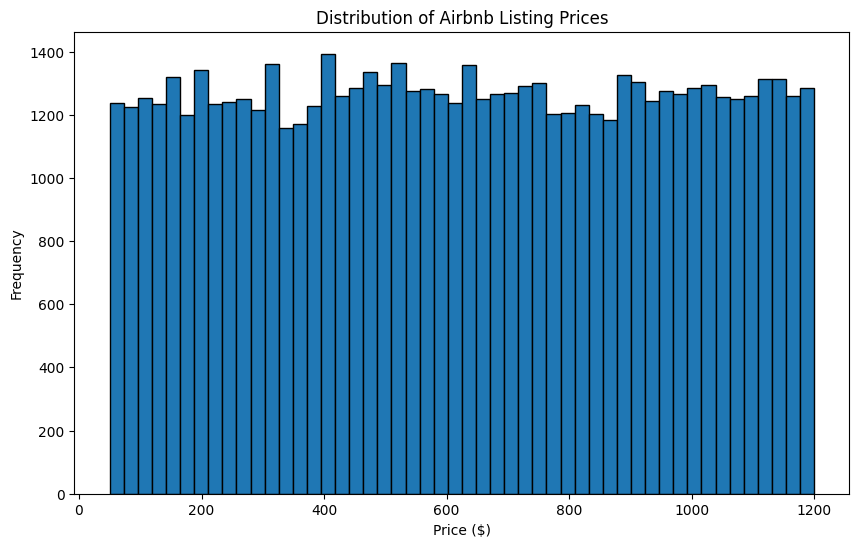

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['price_$'], bins=50, edgecolor='black')
plt.title("Distribution of Airbnb Listing Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()